In [15]:
import numpy as np
from matplotlib import pyplot as plt
from implicit.bpr import BayesianPersonalizedRanking as bpr
from surprise import Dataset
from scipy.sparse import coo_matrix
from Uncertain.RankingAggregation import RankingAggregation

data = Dataset.load_builtin('ml-100k')
train = data.build_full_trainset()
n, m = train.n_users, train.n_items
data = coo_matrix(([float(d[2]) for d in data.raw_ratings], ([int(d[0])-1 for d in data.raw_ratings], [int(d[1])-1 for d in data.raw_ratings])), shape=(n, m)).T

ensemble = 20
factors = 100
epochs = 100

In [16]:
models = []
for i in range(ensemble):
    model = bpr(factors=100, verify_negative_samples=True, iterations=epochs)
    model.fit(data, show_progress=False)
    models.append(model)
    print(models[i].recommend(0, data.tocsr(), 5))

[(49, 3.9191463), (152, 3.2843533), (6, 2.8594685), (171, 2.8237686), (99, 2.8212652)]
[(49, 3.77773), (152, 2.9993167), (6, 2.8633094), (175, 2.6692953), (172, 2.6528807)]
[(49, 3.6114733), (6, 3.091477), (152, 3.0595386), (99, 3.0155907), (172, 2.8398566)]
[(49, 3.6659803), (6, 3.2902122), (152, 3.1504438), (175, 2.9986222), (227, 2.8049355)]
[(49, 3.8769798), (152, 3.434049), (6, 3.3313015), (175, 2.907463), (227, 2.8802204)]
[(49, 3.6727242), (152, 3.0762732), (6, 2.86932), (99, 2.7899115), (256, 2.7466497)]
[(49, 3.9226918), (152, 3.2862442), (6, 3.0652962), (175, 2.7339606), (153, 2.6471756)]
[(49, 3.647889), (6, 2.846555), (174, 2.7415214), (152, 2.5759835), (99, 2.5425973)]
[(49, 3.9726324), (6, 3.2921531), (152, 2.9104433), (175, 2.8715153), (227, 2.7738526)]
[(49, 3.8344116), (6, 3.3623154), (152, 3.2142534), (99, 3.1939826), (174, 2.8769066)]
[(49, 3.6974196), (6, 3.1597428), (152, 3.1189833), (99, 2.8725173), (256, 2.6583908)]
[(49, 3.8742208), (152, 3.0744045), (256, 2.740

In [25]:
model = RankingAggregation(models, data.tocsr())
print(model.recommend(0, N=10))

user: 0  -  Kendall's W: 0.63 
Top 1: 49         avg_rank = 1.05     unc = 0.22 
Top 2: 152        avg_rank = 2.50     unc = 0.74 
Top 3: 6          avg_rank = 2.85     unc = 0.96 
Top 4: 99         avg_rank = 6.15     unc = 2.59 
Top 5: 175        avg_rank = 6.40     unc = 2.52 
Top 6: 174        avg_rank = 8.45     unc = 3.01 
Top 7: 155        avg_rank = 9.95     unc = 3.40 
Top 8: 227        avg_rank = 10.00     unc = 4.30 
Top 9: 153        avg_rank = 10.15     unc = 3.86 
Top 10: 256        avg_rank = 10.30     unc = 6.52 



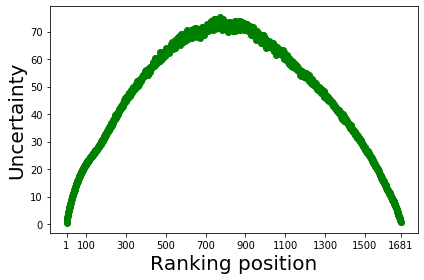

In [26]:
unc = np.full((data.shape[1], data.shape[0]), np.nan)
for i in range(data.shape[1]):
    rec = model.recommend(i, N=data.shape[0]).unc
    unc[i, :len(rec)] = rec
unc = unc[:, np.invert(np.all(np.isnan(unc), axis=0))];
avg = np.nanmean(unc, axis=0)
f, ax = plt.subplots()
ax.plot(range(1, len(avg)+1), avg, 'go')
ax.set_xticks([1, 100] + list(range(300, len(avg)+1, 200)) + [len(avg)])
ax.set_xlabel('Ranking position', Fontsize=20)
ax.set_ylabel('Uncertainty', Fontsize=20)
f.tight_layout()

In [ ]:
# Metric that takes uncertainty as penalization
# Cutoff before aggregation
# Ablation study - either random or using timestamps

# Maan withney and wilcoxxon